<h1>Sales Exploratory Data Analysis <h1>

## Table of contents

* 1 Overview

* 2 Importing the required modules

* 3 Exploring the dataframe
    * a) shape of the dataframe
    * b) summary of the dataframe
    * c) data description
    * d) checking missing data
    * e) observation

* 4 Cleaning the data
    * a) converting columns and rows to lower case
    * b) renaming long column name to less words
    * c) handling missing data
    * d) converting incorrect data types
   
* 5 Data analysis
    * a) who are the top 5 best performing countries in terms of total sales?
    * b) who are the least 5 best performing countries in terms of total sales?
    * c) most product sold

## 1 Overview
This project is aimed at analysing the top countries with the highest and most products sold.

Python data anaylsis tools would be used to get thus done.

<h2>2) Importing the required modules <h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h2>2) Loading the dataset<h2>

In [2]:
data = pd.read_csv("sales_data_sample.csv", sep=",", encoding='Latin-1')
pd.set_option('display.max_columns', None)
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## 3) Exploring the dataframe

### a) Determine the shape of the database 

In [3]:
rows = data.shape[0]
columns =data.shape[1]

print("This dataset has",rows,"rows and",columns,"columns.")

This dataset has 2823 rows and 25 columns.


## b) Check the summary of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


## c)  dataset description
The dataset for this project was sourced from [kaggle.com](https://www.kaggle.com/datasets/kyanyoga/sample-sales-data).
The dataset contains information about 2800 instances (customers, in this case) across 25 different attributes ranging from OrderedNumber to Productline and so on.

## d) Checking missing data

In [5]:
if data.isnull().sum().sum() > 0:
    print(f'There are/is {data.isnull().sum().sum()} missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are/is 5157 missing values in this dataset


### Observations:

1. The columns and rows are in upper case.
2. Certain columns have longer names.
3. The data type of the values in the ORDEREDATE column is a `string`, we will convert them into a `datetime` data type.
4. The data type of the values in the PHONE and POSTAL CODE column are `object`, we will convert them into an `integer` data type
5. The dataframe contains missing values

## 4) Cleaning the Data

### a) Converting columns and rows to lower case

In [6]:
data.columns = data.columns.str.lower()

In [7]:
strings = list(data.dtypes[data.dtypes== 'object'].index)

for rows in strings:
    data[rows] = data[rows].str.lower().str.replace(' ', '_')

### b) Renaming long columns names, to lesser words

In [8]:
data.rename(columns = {
                         'sales' : 'total_price',
                         'dealsize' : 'deal_size',
                         'orderdate' : 'orderd_date',
                         'ordernumber' : 'orderd_num',
                         'postalcode' : 'postal_code',
                         'productcode' : 'product_code',
                         'productline' : 'product_line',
                         'priceeach' : 'price_per_item',
                         'customername' : 'customer_name',
                         'quantityordered' : 'qty_ordered',
                         'orderlinenumber' : 'order_line_num',
                         'contactfirstname' : 'first_name',
                         'contactlastname' : 'last_name'
                       
                          }, inplace = True)

### c) Handling missing values

In [9]:
# missing values for addressline2 is filled with 'not available'
data.addressline2 = data.addressline2.replace(np.nan, 'not available')

# missing values for State is filled with  'not given' 
data.state = data.state.replace(np.nan, 'Not available')

# missing values for territory is replaced with 'not available'
data.territory = data.territory.replace(np.nan, 'not available')

In [10]:
# missing values for postalcode is relaced with zero
data['postal_code'] = data['postal_code'].fillna(0)

# mising values for phone is replace with zero's
data['phone'] = data['phone'].fillna(0)

In [11]:
if data.isnull().sum().sum() > 0:
    print(f'There are/is {data.isnull().sum().sum()} missing values in this dataset')
else:
    print('There are no missing values in this dataset')

There are no missing values in this dataset


In [12]:
data.head()

,orderd_num,qty_ordered,price_per_item,order_line_num,total_price,orderd_date,status,qtr_id,month_id,year_id,product_line,msrp,product_code,customer_name,phone,addressline1,addressline2,city,state,postal_code,country,territory,last_name,first_name,deal_size
0,10107,30,95.70,2,2871.00,2/24/2003_0:00,shipped,1,2,2003,motorcycles,95,s10_1678,land_of_toys_inc.,2125557818,897_long_airport_avenue,not available,nyc,ny,10022,usa,not available,yu,kwai,small
1,10121,34,81.35,5,2765.90,5/7/2003_0:00,shipped,2,5,2003,motorcycles,95,s10_1678,reims_collectables,26.47.1555,59_rue_de_l'abbaye,not available,reims,Not available,51100,france,emea,henriot,paul,small
2,10134,41,94.74,2,3884.34,7/1/2003_0:00,shipped,3,7,2003,motorcycles,95,s10_1678,lyon_souveniers,+33_1_46_62_7555,27_rue_du_colonel_pierre_avia,not available,paris,Not available,75508,france,emea,da_cunha,daniel,medium
3,10145,45,83.26,6,3746.70,8/25/2003_0:00,shipped,3,8,2003,motorcycles,95,s10_1678,toys4grownups.com,6265557265,78934_hillside_dr.,not available,pasadena,ca,90003,usa,not available,young,julie,medium
4,10159,49,100.00,14,5205.27,10/10/2003_0:00,shipped,4,10,2003,motorcycles,95,s10_1678,corporate_gift_ideas_co.,6505551386,7734_strong_st.,not available,san_francisco,ca,0,usa,not available,brown,julie,medium


### d) Converting incorrect data types

In [13]:
# a default _0:00 in the column was stripped off ordered_date
data['orderd_date'] = data['orderd_date'].astype(str).str.replace('_0:00', ' ')

# order_date is been converted to a timestamp
data['orderd_date'] = pd.to_datetime(data['orderd_date'])

# postal_code is been converted int64
data['postal_code'] = pd.to_numeric(data['postal_code'], errors = "coerce")
data['postal_code'] = data['postal_code'].fillna(0)
data['postal_code'] = data['postal_code'].astype(np.int64)

# phone is been converted to int64
data['phone'] = pd.to_numeric(data['phone'], errors = "coerce")
data['phone'] = data['phone'].fillna(0)
data['phone'] = data['phone'].astype(np.int64)


data.head()

,orderd_num,qty_ordered,price_per_item,order_line_num,total_price,orderd_date,status,qtr_id,month_id,year_id,product_line,msrp,product_code,customer_name,phone,addressline1,addressline2,city,state,postal_code,country,territory,last_name,first_name,deal_size
0,10107,30,95.70,2,2871.00,2003-02-24,shipped,1,2,2003,motorcycles,95,s10_1678,land_of_toys_inc.,2125557818,897_long_airport_avenue,not available,nyc,ny,10022,usa,not available,yu,kwai,small
1,10121,34,81.35,5,2765.90,2003-05-07,shipped,2,5,2003,motorcycles,95,s10_1678,reims_collectables,0,59_rue_de_l'abbaye,not available,reims,Not available,51100,france,emea,henriot,paul,small
2,10134,41,94.74,2,3884.34,2003-07-01,shipped,3,7,2003,motorcycles,95,s10_1678,lyon_souveniers,0,27_rue_du_colonel_pierre_avia,not available,paris,Not available,75508,france,emea,da_cunha,daniel,medium
3,10145,45,83.26,6,3746.70,2003-08-25,shipped,3,8,2003,motorcycles,95,s10_1678,toys4grownups.com,6265557265,78934_hillside_dr.,not available,pasadena,ca,90003,usa,not available,young,julie,medium
4,10159,49,100.00,14,5205.27,2003-10-10,shipped,4,10,2003,motorcycles,95,s10_1678,corporate_gift_ideas_co.,6505551386,7734_strong_st.,not available,san_francisco,ca,0,usa,not available,brown,julie,medium


In [14]:
data.isnull().sum()

orderd_num        0
qty_ordered       0
price_per_item    0
order_line_num    0
total_price       0
orderd_date       0
status            0
qtr_id            0
month_id          0
year_id           0
product_line      0
msrp              0
product_code      0
customer_name     0
phone             0
addressline1      0
addressline2      0
city              0
state             0
postal_code       0
country           0
territory         0
last_name         0
first_name        0
deal_size         0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   orderd_num      2823 non-null   int64         
 1   qty_ordered     2823 non-null   int64         
 2   price_per_item  2823 non-null   float64       
 3   order_line_num  2823 non-null   int64         
 4   total_price     2823 non-null   float64       
 5   orderd_date     2823 non-null   datetime64[ns]
 6   status          2823 non-null   object        
 7   qtr_id          2823 non-null   int64         
 8   month_id        2823 non-null   int64         
 9   year_id         2823 non-null   int64         
 10  product_line    2823 non-null   object        
 11  msrp            2823 non-null   int64         
 12  product_code    2823 non-null   object        
 13  customer_name   2823 non-null   object        
 14  phone           2823 non-null   int64         
 15  addr

#### 

## 5) Data Analysis

1. Who are the top 5 countries with the highest and lowest sales
2. Ranking most sold products

### 1) Who are the top 5 best performing countries in terms of total sales?

In [16]:
# grouping the dataset by ordered_date against total_price
country= data.groupby('country')['total_price'].sum()

# Converting the series into dataframe and sort the total_price per country
country = country.to_frame().sort_values('total_price', ascending=False)

# resetting the index
country = country.reset_index()

In [17]:
country.head()

,country,total_price
0,usa,3627982.83
1,spain,1215686.92
2,france,1110916.52
3,australia,630623.10
4,uk,478880.46


### 2) Who are the top 5 worst performing countries in terms of total sales?

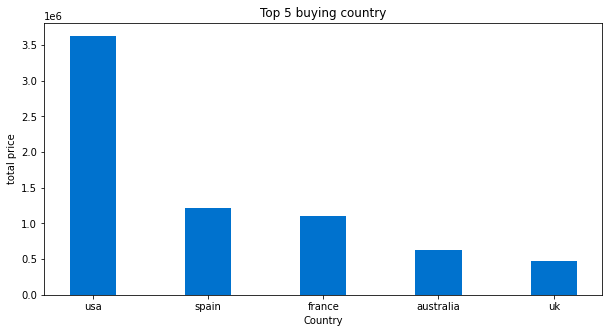

In [18]:
# Creating a bar graph
top_country = country['country'].head()
top_price = country['total_price'].head()

fig = plt.figure(figsize = (10,5)) 
plt.bar(top_country,top_price, color = '#0072ce', width = 0.4)


plt.xlabel("Country")
plt.ylabel("total price")
plt.title("Top 5 buying country")
plt.show()

<h3> USA, Spain, France, Australia, and UK, are the top most ordering countries<h3>

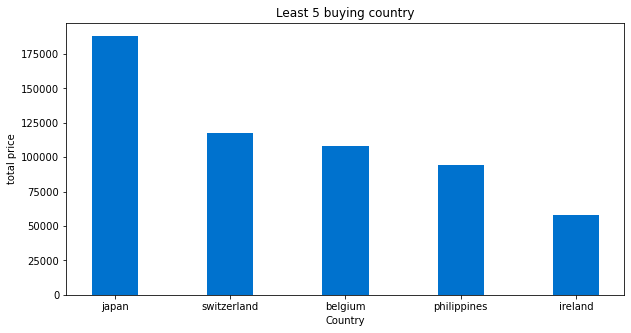

In [19]:
# Creating a bar graph
least = country['country'].tail()
least_price = country['total_price'].tail()

fig = plt.figure(figsize = (10,5)) 
plt.bar(least,least_price, color = '#0072ce', width = 0.4)


plt.xlabel("Country")
plt.ylabel("total price")
plt.title("Least 5 buying country")
plt.show()

<h3>Top less odering countries are Japan, Switzerland, Belgium, Phillipines and Island<h3>

### 2) Ranking the most sold products.

In [20]:
# grouping the dataset by product_line against total_price
product = data.groupby('product_line')['total_price'].sum()

# Converting the series into dataframe and sort the total_price per country
product = product.to_frame().sort_values('total_price', ascending=False)

# resetting the index
product = product.reset_index()

In [21]:
product.head()

,product_line,total_price
0,classic_cars,3919615.66
1,vintage_cars,1903150.84
2,motorcycles,1166388.34
3,trucks_and_buses,1127789.84
4,planes,975003.57


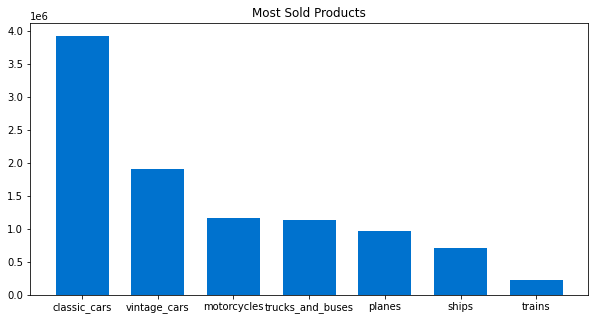

In [22]:
# Creating a bar graph
fig = plt.figure(figsize = (10,5)) 
plt.bar(product['product_line'], product['total_price'], color = '#0072ce', width = 0.7)


plt.title("Most Sold Products")
plt.show()